In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mimg

from scipy import stats
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier

import os
import cv2
import glob
import pickle
import random
import warnings

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
main_folder_path = r"D:\SixthSemProjects\ASL_Alphabet_Dataset\asl_alphabet_train"
subfolders = os.listdir(main_folder_path)

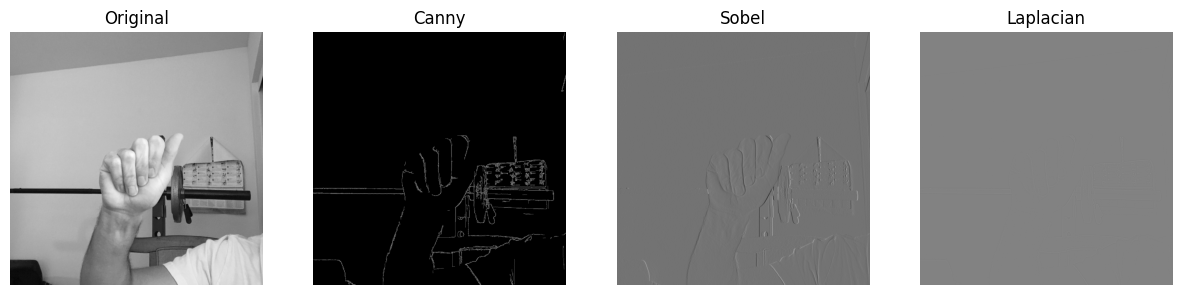

In [5]:
image = cv2.imread(r"D:\SixthSemProjects\ASL_Alphabet_Dataset\asl_alphabet_train\A\1.jpg", cv2.IMREAD_GRAYSCALE)

canny = cv2.Canny(image, 50, 150)
sobel = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
laplacian = cv2.Laplacian(image, cv2.CV_64F)

titles = ['Original', 'Canny', 'Sobel', 'Laplacian']
images = [image, canny, sobel, laplacian]

fig, axes = plt.subplots(1, 4, figsize=(15,15))
for ax, img, title in zip(axes, images, titles):
    ax.imshow(img, cmap='gray')
    ax.set_title(title)
    ax.axis("off")
plt.show()


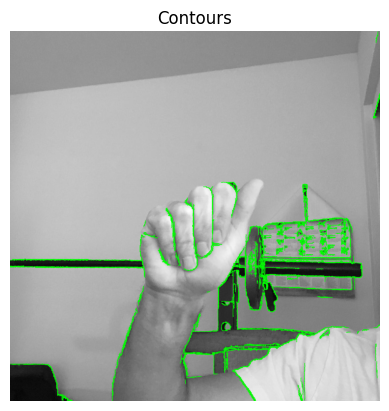

In [ ]:
contours, _ = cv2.findContours(canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

contour_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)

plt.imshow(contour_image)
plt.title("Contours")
plt.axis("off")
plt.show()


In [2]:
import cv2

# Load the image
image = cv2.imread(r"D:\SixthSemProjects\ASL_Alphabet_Dataset\asl_alphabet_train\A\1.jpg",cv2.IMREAD_UNCHANGED)

# Get the dimensions
height, width, channels = image.shape

print(f"Height: {height}, Width: {width}, Channels: {channels}")


Height: 1920, Width: 1920, Channels: 3


In [3]:
resized_image = cv2.resize(image, (128,128))

cv2.imwrite('resizedimage.jpg', resized_image)

True

In [3]:
cv2.destroyAllWindows()

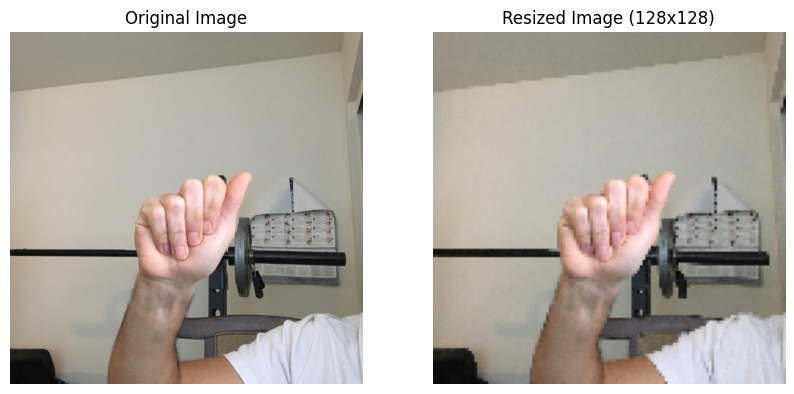

In [ ]:
    import cv2
    import matplotlib.pyplot as plt

    # Load the image
    image = cv2.imread(r"D:\SixthSemProjects\ASL_Alphabet_Dataset\asl_alphabet_train\A\1.jpg")

    # Check if the image is loaded
    if image is None:
        print("Error: Image not loaded. Please check the file path.")
    else:
        # Resize the image to 128x128
        resized_image = cv2.resize(image, (128, 128))

        # Convert BGR to RGB for displaying with matplotlib
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        resized_image_rgb = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)

        # Plot the original and resized images side by side
        plt.figure(figsize=(10, 5))

        # Original Image
        plt.subplot(1, 2, 1)
        plt.imshow(image_rgb)
        plt.title("Original Image")
        plt.axis('off')

        # Resized Image
        plt.subplot(1, 2, 2)
        plt.imshow(resized_image_rgb)
        plt.title("Resized Image (128x128)")
        plt.axis('off')

        plt.show()


In [7]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np

# Load an example image (you can replace this with your own image path)
img_path = r"D:\SixthSemProjects\ASL_Alphabet_Dataset\asl_alphabet_train\A\1.jpg"
img = image.load_img(img_path, target_size=(128, 128))  # Resize to 128x128

# Convert image to numpy array
img_array = image.img_to_array(img)

# Normalize the image (rescale to 0-1 range)
img_array_normalized = img_array / 255.0




In [ ]:
import matplotlib.pyplot as plt
import numpy as np

data = np.random.random((4, 4))

fig, ax = plt.subplots()
# Using matshow here just because it sets the ticks up nicely. imshow is faster.
ax.matshow(data, cmap='seismic')

for (i, j), z in np.ndenumerate(data):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

plt.show()

In [8]:
img_array.shape

(128, 128, 3)

In [3]:
img_array_normalized

array([[[0.6156863 , 0.5803922 , 0.54509807],
        [0.6       , 0.5647059 , 0.5294118 ],
        [0.6117647 , 0.5764706 , 0.5411765 ],
        ...,
        [0.61960787, 0.58431375, 0.5176471 ],
        [0.6313726 , 0.59607846, 0.5294118 ],
        [0.52156866, 0.49411765, 0.43137255]],

       [[0.6156863 , 0.5803922 , 0.54509807],
        [0.60784316, 0.57254905, 0.5372549 ],
        [0.60784316, 0.5764706 , 0.53333336],
        ...,
        [0.627451  , 0.58431375, 0.5137255 ],
        [0.62352943, 0.5882353 , 0.52156866],
        [0.4862745 , 0.4627451 , 0.40784314]],

       [[0.6039216 , 0.5686275 , 0.53333336],
        [0.60784316, 0.57254905, 0.5372549 ],
        [0.6039216 , 0.57254905, 0.5294118 ],
        ...,
        [0.6392157 , 0.59607846, 0.5254902 ],
        [0.6392157 , 0.6039216 , 0.5372549 ],
        [0.5058824 , 0.49411765, 0.43529412]],

       ...,

       [[0.05882353, 0.05882353, 0.05882353],
        [0.05490196, 0.05490196, 0.05490196],
        [0.03137255, 0